<a href="https://colab.research.google.com/github/dkm4/Iris-classification-problem/blob/main/Iris_Classification_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Essential imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

# Load the dataset

In [2]:
iris = load_iris()

In [3]:
concatenated_data = np.c_[iris.data, iris.target.reshape(-1, 1)]
concatenated_features = iris.feature_names + ['target']
my_data = pd.DataFrame(concatenated_data, columns=concatenated_features)
my_data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


# Plotting

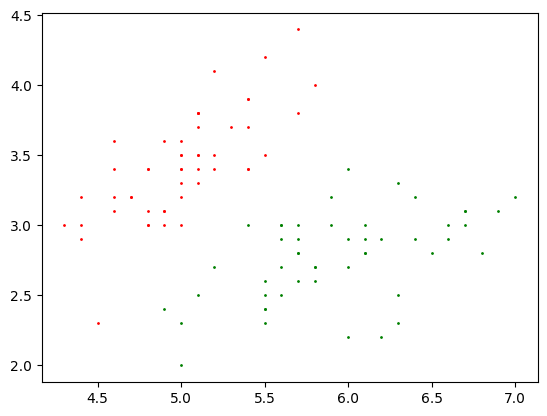

In [4]:
class_0 = my_data[my_data['target']==0.0]
class_1 = my_data[my_data['target']==1.0]
class_2 = my_data[my_data['target']==2.0]
plt.scatter(class_0['sepal length (cm)'].values.tolist(), class_0['sepal width (cm)'].values.tolist(), c='r', s=1)
plt.scatter(class_1['sepal length (cm)'].values.tolist(), class_1['sepal width (cm)'].values.tolist(), c='g', s=1)


# Some dataset metrics

In [5]:
my_data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [6]:
my_data['target'].value_counts()

0.0    50
1.0    50
2.0    50
Name: target, dtype: int64

# Train Test split

In [7]:
X = my_data.drop('target', axis=1)
Y = my_data['target']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)
print("X train", X_train.shape)
print("X test", X_test.shape)
print("Y train", Y_train.shape)
print("Y test", Y_test.shape)

X train (112, 4)
X test (38, 4)
Y train (112,)
Y test (38,)


In [8]:
print(X_test)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
73                 6.1               2.8                4.7               1.2
18                 5.7               3.8                1.7               0.3
118                7.7               2.6                6.9               2.3
78                 6.0               2.9                4.5               1.5
76                 6.8               2.8                4.8               1.4
31                 5.4               3.4                1.5               0.4
64                 5.6               2.9                3.6               1.3
141                6.9               3.1                5.1               2.3
68                 6.2               2.2                4.5               1.5
82                 5.8               2.7                3.9               1.2
110                6.5               3.2                5.1               2.0
12                 4.8               3.0                1.4     

# Optional: Perform the scaling of dataset

In [9]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
print(X_test)

[[ 0.33066442 -0.55192639  0.51683569 -0.01918559]
 [-0.15985763  1.7460571  -1.21973223 -1.22787777]
 [ 2.29275265 -1.01152309  1.79031883  1.45810485]
 [ 0.20803391 -0.32212804  0.4010645   0.3837118 ]
 [ 1.18907802 -0.55192639  0.57472129  0.24941267]
 [-0.52774918  0.8268637  -1.33550342 -1.09357864]
 [-0.28248815 -0.32212804 -0.11990588  0.11511354]
 [ 1.31170853  0.13746866  0.74837808  1.45810485]
 [ 0.45329494 -1.93071649  0.4010645   0.3837118 ]
 [-0.03722712 -0.78172474  0.05375091 -0.01918559]
 [ 0.82118648  0.367267    0.74837808  1.05520746]
 [-1.26353226 -0.09232969 -1.39338902 -1.49647603]
 [-0.40511866  1.05666205 -1.45127462 -1.3621769 ]
 [-1.14090175  0.13746866 -1.33550342 -1.49647603]
 [-0.89564072  1.7460571  -1.33550342 -1.22787777]
 [ 0.57592545  0.59706535  0.51683569  0.51801093]
 [ 0.82118648 -0.09232969  1.15357726  1.32380572]
 [-0.28248815 -1.24132144  0.05375091 -0.15348472]
 [-0.15985763 -0.55192639  0.4010645   0.11511354]
 [ 0.69855596 -0.55192639  1.03

# Build a model and train it

In [11]:
import warnings
from sklearn.metrics import accuracy_score, classification_report
warnings.filterwarnings("ignore")
from sklearn.svm import SVC
model = SVC(kernel='linear', C=1, max_iter=1000)
model.fit(X_train, Y_train)
print("Model training is finished")
Y_train_pred = model.predict(X_train)
print("My training accuracy is ", 100.0*accuracy_score(Y_train, Y_train_pred))

Model training is finished
My training accuracy is  97.32142857142857


# Pick the trained model and make test predictions

In [12]:
Y_test_pred = model.predict(X_test)
print("My testing accuracy is ", 100.0*accuracy_score(Y_test_pred, Y_test))

My testing accuracy is  97.36842105263158


# More metrics

In [13]:
print(classification_report(Y_test, Y_test_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        15
         1.0       1.00      0.91      0.95        11
         2.0       0.92      1.00      0.96        12

    accuracy                           0.97        38
   macro avg       0.97      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38

